# Communication Systems 3 (ENG3014)
### Prof. D. C. Hutchings, James Watt School of Engineering, University of Glasgow
## Amplitude Modulation Examples from Lectures and Tutorials

In [1]:
from __future__ import division
import sympy as sp
from sympy.plotting import plot
import numpy as np
import scipy.fftpack as fp
import scipy.ndimage as ip
import matplotlib.pyplot as plt
import scipy.signal as signal
from sympy import init_printing
init_printing(use_latex='mathjax')

t, tau, v, w = sp.symbols('t,tau,v,w', real=True)
f = sp.Function('f', real=True)

ndim = 1024
vc = 32.0
vm = 1.0

### Double sideband, suppressed carrier

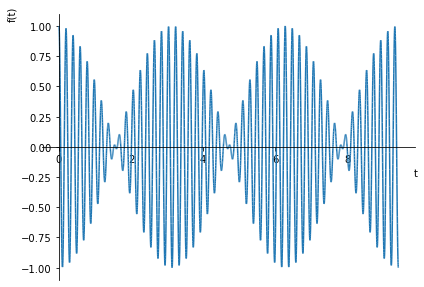

cos(31.0⋅t)   cos(33.0⋅t)
─────────── + ───────────
     2             2     

<Figure size 432x288 with 0 Axes>

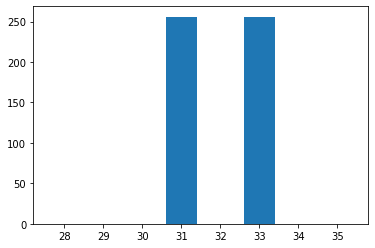

In [2]:
def f(t):
    return sp.cos(vm*t)*sp.cos(vc*t)

plot(f(t),(t,0,3*np.pi),adaptive=False,nb_of_points=4096)
display(sp.expand(f(t).rewrite(sp.exp)).rewrite(sp.cos))

v = np.arange(28,36)
fdat = [f(2.*np.pi*i/ndim) for i in range(ndim)]
plt.figure()
fig, ax = plt.subplots()
ax.bar(v,np.abs(fp.fft(fdat))[v])
plt.show()

### Double sideband, large carrier 

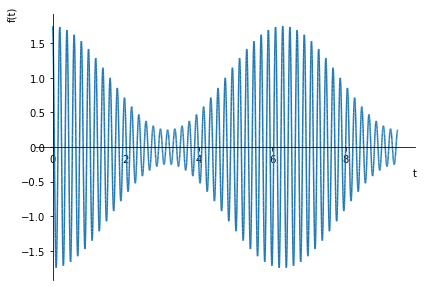

0.375⋅cos(31.0⋅t) + 1.0⋅cos(32.0⋅t) + 0.375⋅cos(33.0⋅t)

<Figure size 432x288 with 0 Axes>

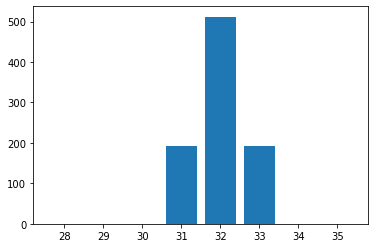

In [3]:
m = 0.75
def f(t):
    return (1.+m*sp.cos(vm*t))*sp.cos(vc*t)

plot(f(t),(t,0,3*np.pi),adaptive=False,nb_of_points=4096)
display(sp.expand(f(t).rewrite(sp.exp)).rewrite(sp.cos))

v = np.arange(28,36)
fdat = [f(2.*np.pi*i/ndim) for i in range(ndim)]
plt.figure()
fig, ax = plt.subplots()
ax.bar(v,np.abs(fp.fft(fdat))[v])
plt.show()

### Rectified DSB-LC

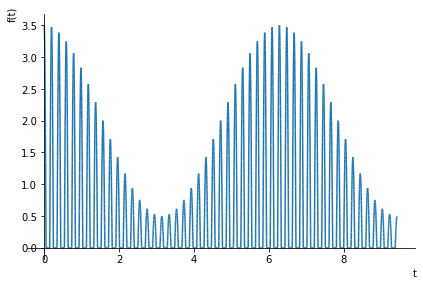

In [4]:
plot((f(t)+np.abs(f(t))),(t,0,3*np.pi),adaptive=False,nb_of_points=4096)

### Now send through sampled analogue low-pass filter

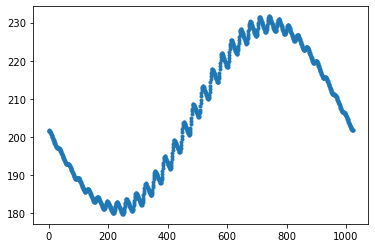

<Figure size 432x288 with 0 Axes>

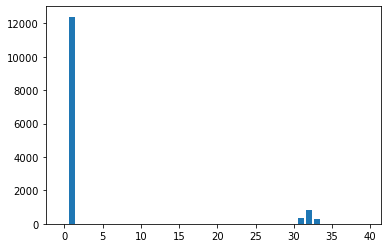

In [5]:
hdat = np.exp(-np.arange(ndim)/ndim)
fdat = np.zeros(ndim)
for i in range(ndim):
    tmp = f(2.*np.pi*i/ndim)
    fdat[i] = (tmp+np.abs(tmp))/2.
gdat = ip.convolve(fdat,hdat,mode="wrap")
fftgdat = np.abs(fp.fft(gdat))
# set DC=0 as if a coupling capicitor is used
fftgdat[0] = 0.0

plt.figure()
plt.plot(gdat,'.')
plt.show()
v = np.arange(0,40)
plt.figure()
fig, ax = plt.subplots()
ax.bar(v,fftgdat[v])
plt.show()

### Now send through automatically-designed low-pass FIR filter

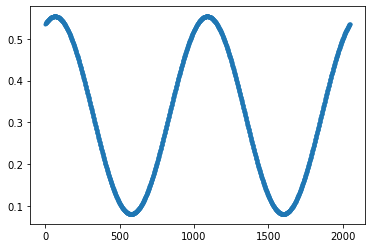

<Figure size 432x288 with 0 Axes>

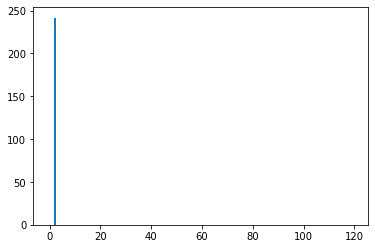

In [8]:
numtaps = 128
mydelays = np.arange(numtaps)
b1 = signal.firwin(numtaps, 1./64.)
gdat = signal.lfilter(b1,1,np.tile(fdat,3))

fftgdat = np.abs(fp.fft(gdat[ndim:3*ndim]))
# set DC=0 as if a coupling capicitor is used
fftgdat[0] = 0.0

plt.figure()
plt.plot(gdat[ndim:3*ndim],'.')
plt.show()
v = np.arange(0,120)
plt.figure()
fig, ax = plt.subplots()
ax.bar(v,fftgdat[v])
plt.show()